In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_dir = '/content/drive/MyDrive/CMPE 407/train'
val_dir = '/content/drive/MyDrive/CMPE 407/val'
test_dir = '/content/drive/MyDrive/CMPE 407/test'

#I added sets to my drive account and directory of sets.

In [3]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE=32
#Adjust photos in pixels

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    brightness_range = (1.2, 1.5),
    horizontal_flip = True
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
#Scaled the sets (train set, validation set and test set)

In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)
val_data = train_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)
test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

#In this cell, we adjust the dimensions of the train set, validation set and test set in pixels and classify the photos as binary

Found 3076 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 768 images belonging to 2 classes.


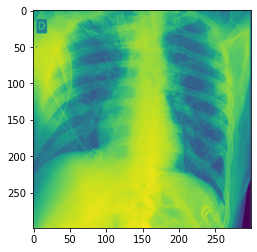

In [6]:
img = mpimg.imread('/content/drive/MyDrive/CMPE 407/test/Covid/COVID-1971.png')
imgplot = plt.imshow(img)
plt.show()

#Example photo of datasets

In [7]:
#Building The Model

In [8]:
model = tf.keras.applications.MobileNetV2()
print(model)

#Applied the MobileNetV2

14548992/14536120 [==============================] - 0s 0us/step


In [9]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
mobilenet.trainable = False


9420800/9406464 [==============================] - 0s 0us/step


In [10]:

inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
pretrained_model=mobilenet(inputs, training=False)
dense = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
model = tf.keras.Model(inputs, outputs)
print(model.summary())
#Inputs, outputs, dense and summary of all model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,570,753
Trainable params: 1,312,769
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [11]:
EPOCHS = 50

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
             'accuracy',
             tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(
                   monitor='val_loss',
                   patience=3,
                   restore_best_weights=True
               )
    ]
)

#AUC represents the decomposable measure or degree of parameters.
#AUC parametrelerin ayrıştırılabilir ölçüsünü veya derecesini temsil eder.

Epoch 1/50
97/97 [==============================] - 454s 5s/step - loss: 0.2360 - accuracy: 0.9122 - auc: 0.9620 - val_loss: 0.0836 - val_accuracy: 0.9714 - val_auc: 0.9948
Epoch 2/50
97/97 [==============================] - 186s 2s/step - loss: 0.0980 - accuracy: 0.9646 - auc: 0.9932 - val_loss: 0.0594 - val_accuracy: 0.9766 - val_auc: 0.9982
Epoch 3/50
97/97 [==============================] - 176s 2s/step - loss: 0.0744 - accuracy: 0.9698 - auc: 0.9964 - val_loss: 0.0530 - val_accuracy: 0.9792 - val_auc: 0.9993
Epoch 4/50
97/97 [==============================] - 175s 2s/step - loss: 0.0642 - accuracy: 0.9789 - auc: 0.9966 - val_loss: 0.0796 - val_accuracy: 0.9609 - val_auc: 0.9964
Epoch 5/50
97/97 [==============================] - 185s 2s/step - loss: 0.0588 - accuracy: 0.9789 - auc: 0.9972 - val_loss: 0.0340 - val_accuracy: 0.9870 - val_auc: 0.9994
Epoch 6/50
97/97 [==============================] - 185s 2s/step - loss: 0.0702 - accuracy: 0.9746 - auc: 0.9956 - val_loss: 0.0554 - v

In [12]:
true_labels = test_data.labels
pred_labels = np.squeeze(np.array(model.predict(test_data ) >= 0.5, dtype=np.int))

cm = confusion_matrix(true_labels, pred_labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [13]:
test_data.class_indices
#Covid and Pneumonia's binary values 0 & 1

{'Covid': 0, 'Pneumonia': 1}

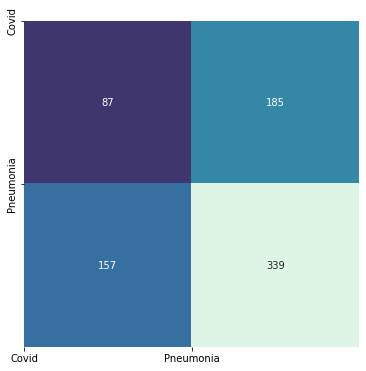

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
plt.xticks(range(2), ['Covid','Pneumonia'])
plt.yticks(range(2),['Covid','Pneumonia'])
plt.show()

#Heatmap

In [15]:
results = model.evaluate(test_data, verbose=0)

accuracy = results[1]
auc = results[2]


In [16]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp+fp)
recall = tp / (tp+fn)

#Accuracy, precision and recall values

In [17]:
print("Accuracy: {:.2f}".format(accuracy))
print("AUC: {:.2f}".format(auc))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.95
AUC: 0.99
Precision: 0.65
Recall: 0.68
